In [2]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [3]:
from google.colab import drive 
drive.mount("/content/driver")

Mounted at /content/driver


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/ND_BienBaoGT

In [5]:
#dow dataset
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [6]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=2fbd902f46db5e63189f1ee58bc99dad4fd33759e582470b17c377a53543cf58
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [7]:
import wget

In [8]:
wget.download(link)

'traffic-signs-data.zip'

In [9]:
data = "./"

In [10]:
!unzip -q traffic-signs-data.zip -d $data

In [11]:
train_link = data + "train.p" # link file train.p
valid_link = data + "valid.p"
test_link = data + "test.p"

In [12]:
import pickle # thu vien de doc file .p

In [13]:
with open(train_link, mode = "rb") as f:
  train = pickle.load(f)

with open(valid_link, mode = "rb") as f:
  valid = pickle.load(f)  # sử dụng bộ valib ở cuối mỗi bước train
                          # để đảm bảo sau mỗi bước train ta đáng giá đ
                          # độ chính xác tăng lên hay giảm đi

with open(test_link, mode = "rb") as f:
  test = pickle.load(f)

In [14]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [15]:
trainX = train["features"]
trainY = train["labels"]   

In [16]:
trainX.shape 
# 34799 ảnh có kích cỡ 32x32x3

(34799, 32, 32, 3)

In [17]:
trainX[34798].shape

(32, 32, 3)

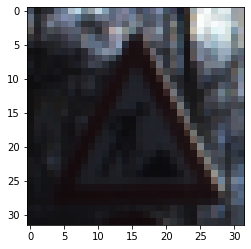

In [18]:
import matplotlib.pyplot as plt
plt.imshow(trainX[34798])

In [19]:
trainY[34798] 
# nhãn của ảnh thứ 34798 có nhãn là 25

25

In [20]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [21]:
classNames[trainY[34797]]
classNames[trainY[34798]]

'Road work'

In [22]:
# Chộn ảnh và nhãn để 0 ảnh hưởng đến tính tổng quát
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY)

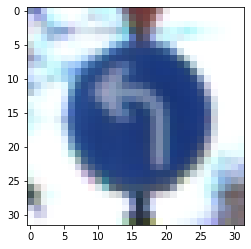

In [23]:
plt.imshow(trainX[34797])

In [24]:
classNames[trainY[34797]]

'Turn left ahead'

In [25]:

validX = valid["features"]
validY = valid["labels"]

testX = test["features"]
testY = test["labels"]

In [26]:
# Chuẩn hoá data xuống giá trị [0,1] 
# để sự ảnh hưởng giữa các datapoit tương đồng nhau nhiều hơn

trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [27]:
trainX[34798]

array([[[0.30196078, 0.3372549 , 0.27058824],
        [0.33333333, 0.35294118, 0.28235294],
        [0.37254902, 0.38039216, 0.30196078],
        ...,
        [0.21176471, 0.23529412, 0.21960784],
        [0.21176471, 0.23137255, 0.20392157],
        [0.23137255, 0.23529412, 0.20392157]],

       [[0.3254902 , 0.34117647, 0.2745098 ],
        [0.32156863, 0.34117647, 0.2627451 ],
        [0.3254902 , 0.34117647, 0.26666667],
        ...,
        [0.21960784, 0.24313725, 0.21960784],
        [0.22745098, 0.24313725, 0.21568627],
        [0.23137255, 0.23137255, 0.2       ]],

       [[0.2627451 , 0.2745098 , 0.21568627],
        [0.22352941, 0.24313725, 0.19215686],
        [0.20784314, 0.23921569, 0.19607843],
        ...,
        [0.23529412, 0.25882353, 0.23921569],
        [0.24313725, 0.2627451 , 0.22745098],
        [0.23921569, 0.24705882, 0.21176471]],

       ...,

       [[0.31372549, 0.33333333, 0.35686275],
        [0.29019608, 0.32156863, 0.34117647],
        [0.28627451, 0

In [28]:
# Vì đầu ra của mạng là onehot [0001...00] nên pai chuyển lable về dạng này

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [29]:
valid["labels"][0]

41

In [30]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

##### Huấn luyện

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [32]:
model = Sequential()

In [33]:
# Định nghĩa ảnh đầu vào
width = 32
height = 32
classes = 43

In [34]:
shape = (width, height, 3)

### Xây dựng dựa trên VGG 16

In [35]:
# Sử dụng 32 kenel, 1 kenel có kt 3x3 
# Dùng padding = "same" sẽ giúp giữ lại data ở phía cạnh
# input_shape=shape xác định kích thước đầu vào cho ảnh đầu tiên
model.add(Conv2D(32,(3,3), padding = "same", input_shape=shape))

In [36]:
model.add(Activation("relu"))

In [37]:
model.add(BatchNormalization())

In [38]:
model.add(Conv2D(32,(3,3), padding="same"))

In [39]:
model.add(Activation("relu"))

In [40]:
model.add(BatchNormalization())

In [41]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [42]:
model.add(Conv2D(64,(3,3), padding = "same"))

In [43]:
model.add(Activation("relu"))

In [44]:
model.add(BatchNormalization())

In [45]:
model.add(Conv2D(64,(3,3), padding = "same"))

In [46]:
model.add(Activation("relu"))

In [47]:
model.add(BatchNormalization())

In [48]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [49]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

### Tăng cường data khi train

In [51]:

# Ta có thể xoay, zoom to, thay đổi kích cỡ để có nhiều đặc trưng hơn mà vẫn giữ nguyên nhãn
aug = ImageDataGenerator(rotation_range = 0.18,zoom_range = 0.15, width_shift_range = 0.2, height_shift_range =0.2, horizontal_flip = True  )

In [52]:
learning_rate = 0.01

In [53]:
epochs = 10
batch_size = 64

In [54]:
opt = SGD(learning_rate = learning_rate, momentum=0.9, decay=learning_rate / epochs)

In [55]:
model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [56]:
print("Start Training...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY),steps_per_epoch=trainX.shape[0] // batch_size, epochs=epochs, verbose=1)

Start Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
543/543 [==============================] - 35s 39ms/step - loss: 2.0923 - accuracy: 0.4003 - val_loss: 1.8921 - val_accuracy: 0.4567
Epoch 2/10
543/543 [==============================] - 21s 39ms/step - loss: 0.9447 - accuracy: 0.6924 - val_loss: 1.7424 - val_accuracy: 0.5277
Epoch 3/10
543/543 [==============================] - 22s 40ms/step - loss: 0.5604 - accuracy: 0.8184 - val_loss: 1.3178 - val_accuracy: 0.6381
Epoch 4/10
543/543 [==============================] - 21s 38ms/step - loss: 0.3734 - accuracy: 0.8808 - val_loss: 1.1645 - val_accuracy: 0.6964
Epoch 5/10
543/543 [==============================] - 21s 38ms/step - loss: 0.2751 - accuracy: 0.9133 - val_loss: 0.9730 - val_accuracy: 0.7410
Epoch 6/10
543/543 [==============================] - 21s 38ms/step - loss: 0.2134 - accuracy: 0.9349 - val_loss: 0.8695 - val_accuracy: 0.7617
Epoch 7/10
543/543 [==============================] - 21s 38ms/step - loss: 0.1716 - accuracy: 0.9503 - val_loss: 0.8768 - val_accuracy:

#### save model

In [57]:
model.save("ldn.h5")

In [58]:
saved_model = tf.keras.models.load_model("ldn.h5")

In [71]:
result = saved_model.predict(testX[11:12])

In [65]:
result

array([[1.11457186e-04, 1.21003526e-04, 3.29789682e-03, 2.66826508e-04,
        4.29755482e-06, 2.53844797e-03, 6.74277777e-03, 4.03373706e-05,
        7.96874792e-06, 8.17114199e-07, 1.25685824e-06, 1.66237191e-03,
        9.36557293e-01, 2.80153358e-06, 3.07831783e-06, 1.32467967e-05,
        9.26836606e-07, 1.08199674e-06, 2.45762531e-05, 2.90260832e-05,
        1.25078459e-05, 1.58690658e-04, 9.58040800e-06, 3.46444249e-05,
        3.90573242e-03, 1.46640302e-03, 6.10411507e-06, 7.70023689e-05,
        3.34754474e-02, 1.60352024e-03, 2.92571873e-04, 3.18989914e-05,
        4.58362365e-06, 3.55314660e-05, 1.12841954e-05, 2.89712596e-04,
        2.03446354e-04, 5.35332110e-05, 5.19430323e-04, 2.03088886e-04,
        1.17990545e-04, 4.44065845e-05, 6.01537991e-03]], dtype=float32)

In [72]:
import numpy as np
final = np.argmax(result)
final = classNames[final]
final

'Speed limit (100km/h)'

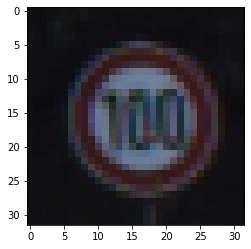

In [74]:
plt.imshow(test["features"][11])